###__Dane do analizy__:  MNIST.csv (Modified National Institute of Standards and Technology database)

###__Cel badania__:  Analiza algorytmu selekcji cech PCA . Wizualizacja danych  za pomocą PCA i t-SNE

###__Klasyfikator__:   Decision tree, kNN, Logistic Regression  +PCA

####__Zadanie 1__: Ładowanie zbioru treningowego, testowego, wstępna analiza  i dodawanie nazw dla kolumn
* Dodać nazwy kolumn: <span style='color:red'>  class, pixel1, pixel2,...pixel 784 </span>
* Wyznaczyć liczbę rekordów, liczbę cech w zbiorze treningowym i testowym.
* Wyznaczyć rozkład kategorii (w procentach).
* Narysować wykres słupkowy rozkładu kategorii.

#####__Zadanie 2__:  Analiza głównych składowych <i>PCA</i>

__Wskazówka__: <span style='color:red'>  from sklearn.decomposition import PCA </span>
##### __Zadanie 2.1__:  Zmienić parametru algorytmu, żeby otrzymać procent wyjaśnionej wariancji wynosi 0.90. Ile wynosi liczba wymiarów?
__Wskazówka: Zmienić parametry__
* Ustawić pca.explained_variance_ratio_
#####__Zadanie 2.2__ :Ile wynosi stopień wyjaśnionej wariancji, jeśli liczna wymiarów należy do przedziału od  [10, 150]?.

####__Zadanie 3__ : Wyznaczyć liczbę wymiarów PCA, żeby stopień wyjaśnionej wariancji = 0.9. Wykonać redukcję danych. Przekształcić dane treningowe i testowe na nową przestrzenią.


####__Zadanie 4__ : Wizualizować  dane oryginalne i dane skompresowane.

##### __Zadanie__ : Trenować klasyfikator  <i> DT </i>  z optymalizacją parametrów na danych oryginalnych.  Wyświetlić czas
__Wskazówka__: <span style='color:red'>   from sklearn.tree import DecisionTreeClassifier </span>

####__Zadanie 6__ : Trenować klasyfikator  <i> DT </i>  z optymalizacją parametrów na danych skompresowanych.  Wyświetlić czas.

####__Zadanie 7__: Trenować klasyfikator  <i> Logistic Regression </i>  z optymalizacją parametrów na danych oryginalnych.  Wyświetlić czas i skuteczność modelu.
__Wskazówka__: <span style='color:red'>  from sklearn.linear_model import LogisticRegression  </span>

####__Zadanie 8__: Trenować klasyfikator  <i>k-NN </i>  z optymalizacją parametrów na danych oryginalnych i zredukowanych.  Wyświetlić czas i skuteczność modelu.

####__Zadanie 9__: Wizualizować dane na dwóch wymiarach wyznaczonych przez t-NSE i PCA (liczba wymiarów =2).

####__Zadanie 10__: Napisać podsumowanie

1. Jaki procent wyjaśnialności wariancji trzeba wybrać, żeby jakość klasyfikatora na danych skompresowanych jest przybliżona do modelu budowanego na danych oryginalnych?
klasyfikator jest najlepszy i z jakimi parametrami?
2. Wśród algorytmów DT, KNN i Logistic Regression, który model zyskuje najwięcej czasu na danych zredukowanych?
3. Która wizualizacja jest lepsza, za pomocą t-SNE (*t-distributed Stochastic Neighbor Embedding*), czy PCA?


s

# Lab 6-7 MNIST Dimension Reduction with PCA
## Zad 1
### Ładowanie danych

In [1]:
import pandas as pd
import numpy as np

path = "./"
df_train = pd.read_csv(path+"mnist_train.csv")
df_test = pd.read_csv(path+"mnist_test.csv")

### Zmiana nazw kolumn

In [2]:
column_names = ['class'] + ['pixel{}'.format(i) for i in range(1, 785)]
df_train.columns = column_names
df_test.columns = column_names

### Rozkład klas w %

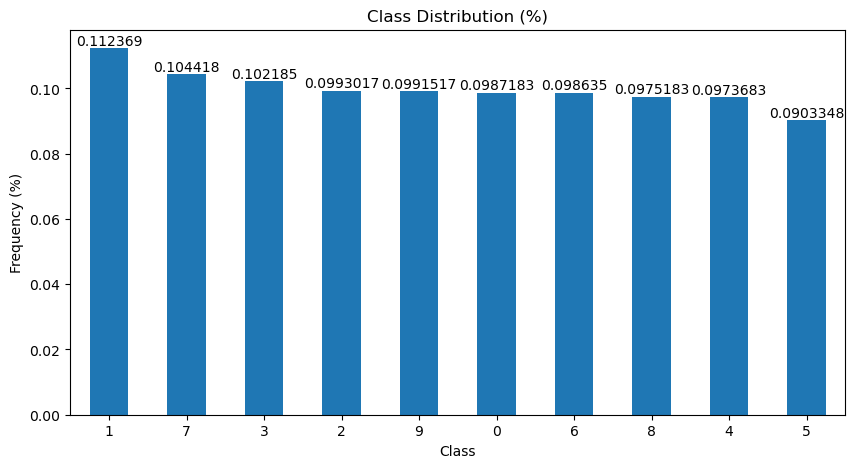

In [3]:
import matplotlib.pyplot as plt

categories = df_train['class'].value_counts().apply(lambda x: x/np.sum(df_train['class'].value_counts()))
# categories = categories.sort_index()

plt.figure(figsize=(10, 5))
categories.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency (%)')
plt.title('Class Distribution (%)')
plt.xticks(rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

In [4]:
X_train = df_train.iloc[:,1:785]
y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:785]
y_test = df_test.iloc[:,0]

print(X_train.shape)
print(X_test.shape)

(59999, 784)
(9999, 784)


## Zad 2
### Analiza głównych składowych PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
pca = PCA(n_components=11)
X_reduced = pca.fit_transform(X_train)

### 2.1 Dostosowanie parametrów PCA by uzyskać explained_variance = 0.9

In [6]:
start_val, end_val = 10, 150
results = {}
threshold = 0.9
best_n_components = start_val
best_explained_variance_ratio = 0
found = False
for i in range(start_val, end_val+1):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    sum = np.sum(pca.explained_variance_ratio_)
    results[i] = sum
    print(f"n_components={i}, explained_variance_ratio={sum}")
    if found == False:
        if sum > threshold:
            best_n_components = i
            best_explained_variance_ratio = sum
            found = True

n_components=10, explained_variance_ratio=0.4881539372584556
n_components=11, explained_variance_ratio=0.5092459757620873
n_components=12, explained_variance_ratio=0.5294758912913663
n_components=13, explained_variance_ratio=0.5466342812668878
n_components=14, explained_variance_ratio=0.5635529337369057
n_components=15, explained_variance_ratio=0.579339360726283
n_components=16, explained_variance_ratio=0.5941691199735712
n_components=17, explained_variance_ratio=0.607414408487038
n_components=18, explained_variance_ratio=0.6201831180538587
n_components=19, explained_variance_ratio=0.6320555594630083
n_components=20, explained_variance_ratio=0.6435824430748651
n_components=21, explained_variance_ratio=0.6542442691324876
n_components=22, explained_variance_ratio=0.6643115410580175
n_components=23, explained_variance_ratio=0.6738471952329188
n_components=24, explained_variance_ratio=0.6829724718082909
n_components=25, explained_variance_ratio=0.6918066472923525
n_components=26, explained

### 2.2 Ile wynosi stopień explained_variance_ratio dla n_components [10, 150]?

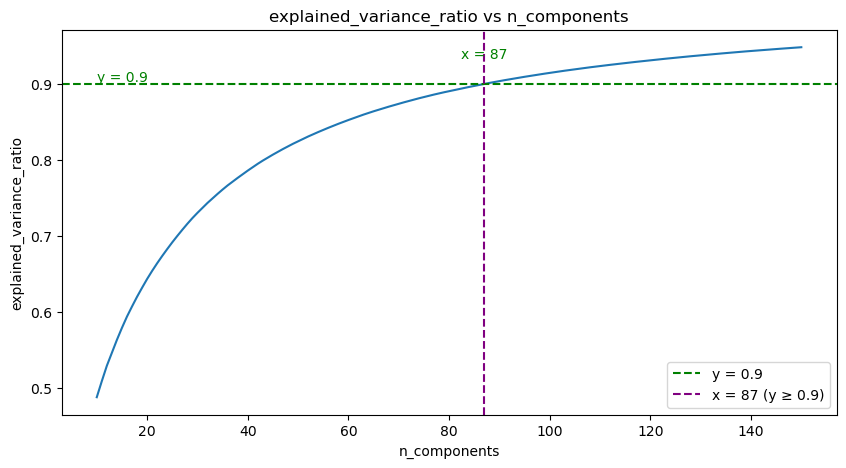

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(results.keys(), results.values())
x = results.keys()
y = results.values()
x_cross = next((x_val for x_val, y_val in zip(x, y) if y_val >= threshold), None)
if x_cross is not None:
    plt.axhline(y=threshold, color='green', linestyle='--', label=f'y = {threshold}')
    plt.axvline(x=x_cross, color='purple', linestyle='--', label=f'x = {x_cross} (y ≥ {threshold})')

    plt.text(min(x), threshold, f"y = {threshold}", color='green', fontsize=10, va='bottom', ha='left')
    plt.text(x_cross, max(y), f"x = {x_cross}", color='green', fontsize=10, va='top', ha='center')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')
plt.title('explained_variance_ratio vs n_components')
plt.legend()
plt.show()

## Zad 3
### Wykonać redukcję danych. Przekształcić dane treningowe i testowe na nową przestrzeń.

In [9]:
pca = PCA(n_components = best_n_components)
X_train_reduced_np = pca.fit_transform(X_train)
X_train_recovered_np = pca.inverse_transform(X_train_reduced_np)
X_train_reduced = pd.DataFrame(X_train_reduced_np)
X_train_recovered = pd.DataFrame(X_train_recovered_np)

X_test_reduced_np = pca.fit_transform(X_test)
X_test_reduced = pd.DataFrame(X_test_reduced_np)

## Zad 4
### Wizualizacja danych oryginalnych i zredukowanych

In [10]:
def visualize_dataset(dataset):
    plt.figure(figsize=(10,4))
    for i in range(8):
        plt.subplot(240+1+i)
        ith_image = dataset.iloc[i,:]
        ith_image_arr = ith_image.to_numpy()
        ith_image= ith_image_arr.reshape(28,28)
        plt.imshow(ith_image, cmap=plt.get_cmap('gray'))
    plt.show()

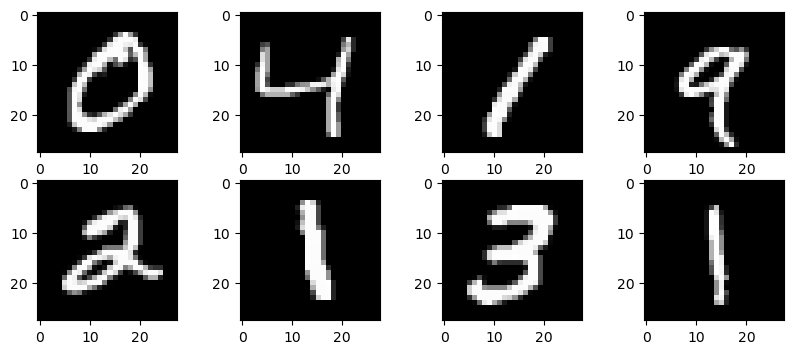

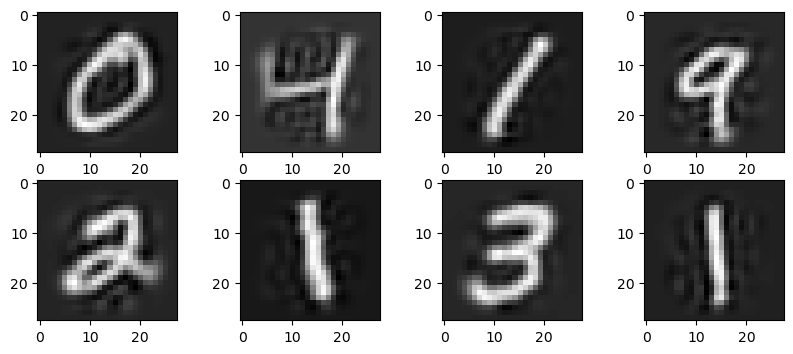

In [12]:
visualize_dataset(X_train)
print("\n")
visualize_dataset(X_train_recovered)

## Zad 5
### Decision Tree

In [ ]:
models = {
    "DecTree":
}
def train_time_eval(model_name, dataset_kind):